In [1]:
import matplotlib.pyplot as plt
from astsadata import *
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cmort.index = cmort.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  gas.index = gas.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:97: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  lap.index = lap.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:109: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  oil.index = oil.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:112: UserWarning: Co

## Types of nonstationary

### 1) Trend stationary (stationary behavior around a trend)
This type of a model can be explained as
$x_t=\mu_t+y_t$ where $x_t$ is the series, $\mu_t$ is the trend and $y_t$ is the stationary process (detrended series).
$\implies \hat{y}_t=x_t-\hat{\mu}_t$ ; where $\hat{~}$ denotes estimates.

The example below shows a series with trend. A linear model between series and time $\mu_t = \beta_0+\beta_1 t$ has been used to represent the trend.

The estimated trend is $\hat{\mu} = -64.5682+0.2993t$

Hence the detrended series (residual series) is $\hat{y}_t=x_t+64.5682-0.2993t$

                            OLS Regression Results                            
Dep. Variable:                chicken   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1974.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.83e-98
Time:                        21:49:28   Log-Likelihood:                -532.83
No. Observations:                 180   AIC:                             1070.
Df Residuals:                     178   BIC:                             1076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.5682      3.176    -17.184      0.0

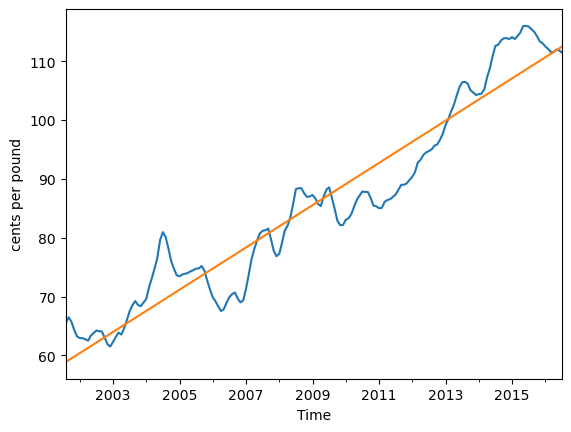

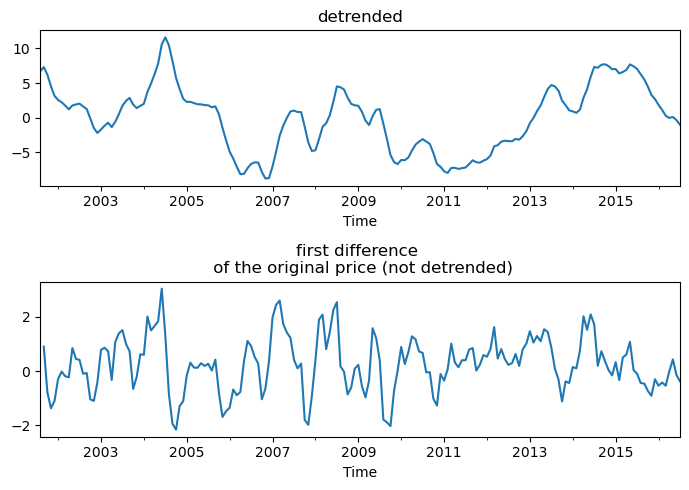

In [6]:
time = pd.Series([idx.ordinal for idx in chicken.index], index=chicken.index)
data_reg = pd.concat([time, chicken], axis=1)
data_reg.columns = ["time", "chicken"]

fit = ols(formula="chicken ~ time", data=data_reg).fit()
print(fit.summary())
ax = chicken.plot(xlabel="Time", ylabel="cents per pound", legend=False)
ax.plot(data_reg.index, fit.params.Intercept + fit.params.time * time)
plt.show()

##to obtain the detrended series and first difference
fig, axes = plt.subplots(nrows=2, figsize=(7, 5))
fit.resid.plot(ax=axes[0], xlabel="Time", title="detrended")
chicken.diff().plot(ax=axes[1], xlabel="Time", 
                    title="first difference \n of the original price (not detrended)",
                    legend=False)
fig.tight_layout()
plt.show()

[]

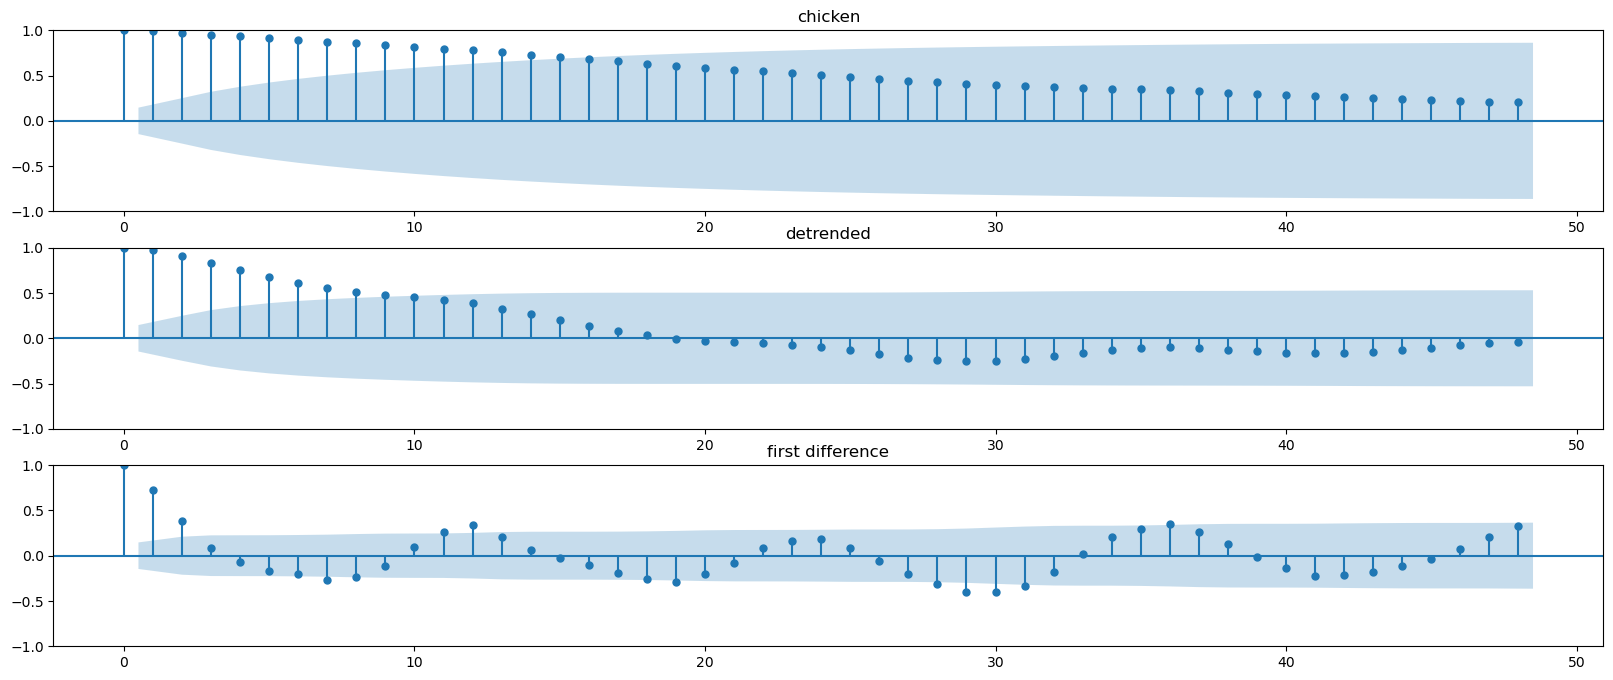

In [17]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 8))
sm.graphics.tsa.plot_acf(chicken.value, lags=48, ax = ax[0], title="chicken")
sm.graphics.tsa.plot_acf(fit.resid, lags=48, ax = ax[1], title="detrended")
sm.graphics.tsa.plot_acf(chicken.diff().value.values[1:], lags=48, ax = ax[2], title="first difference")
plt.plot()

## Also we can design the trend to be stochastic by considering a random walk with a drift. 

We saw in the examples section that random walk model with a drift also behaves as a trended series. Hence this model can be used to model the trend that has an stochastic nature as stated below.

$\mu_t=\delta+\mu_{t-1}+w_t$ where $w_t$ is white noise (independent of $y_t$).

Now differencing yields a stationary process:

$x_t-x_{t-1}=(\mu_t+y_t)-(\mu_{t-1}+y_{t-1})=\delta+w_t+y_t-y_{t-1}$

$y_t-y_{t-1}$ is stationary since $y_t$ is stationary. Hence it can be shown that $x_t-x_{t-1}$ is stationary.


## Advantages of differencing over detrending is it does not involve parameter estimations,
## disadvantage is it does not provide an estimate of $y_t$. If an estimate of $y_t$ is needed then detrending is recommended.

## Also if the trend is fixed (ex: $\mu_t = \beta_0+\beta_1 t$) then the differencing yields stationary data. 

## First difference removes a linear trend, second difference removes a quadratic trend and so on.


## Example : Differencing Global Temperature

The global temparature series behaves more as a random walk than a trend stationary series. So differencing is more appropriate way to get an stationary series.



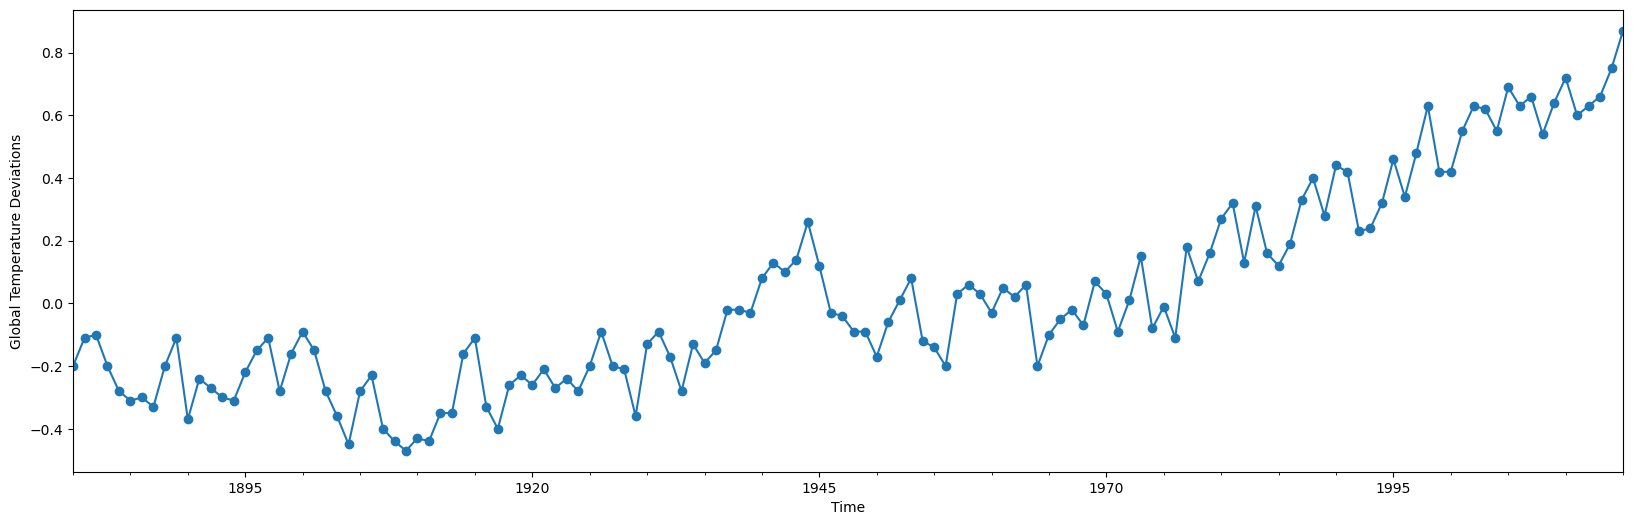

In [5]:
# Example 1.2
fig, ax = plt.subplots(figsize=(20, 6))
globtemp.plot(xlabel='Time', ylabel='Global Temperature Deviations', 
                marker='o', legend=False, ax=ax)
plt.show()

## In this case the ACF (differenced series) shows a minimal autocorrelation which implies that the global temparature series is nearly a random walk with drift.

Random Walk with a drift: $x_t=\delta t+\sum_{j=1}^t w_t$.

Mean of the difference series $E(x_t-x_{t-1})=\delta+E(\sum_{j=1}^t w_j-\sum_{j=1}^{t-1}w_j)=\delta+E(w_t)=\delta$

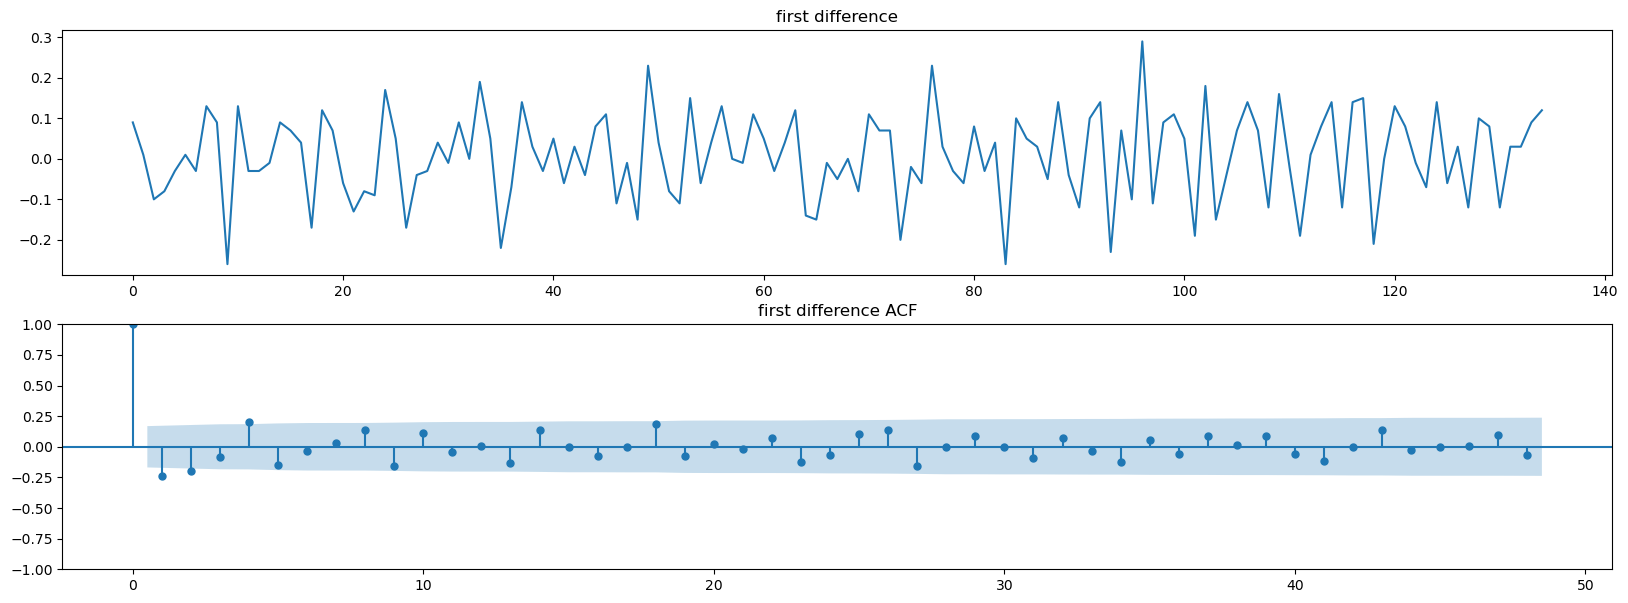

drift =  0.008


In [20]:
fig, ax = plt.subplots(nrows = 2, figsize=(20, 7))
ax[0].plot(globtemp.diff().value.values[1:])
ax[0].set_title("first difference")
sm.graphics.tsa.plot_acf(globtemp.diff().value.values[1:], lags=48, ax = ax[1], title="first difference ACF")
plt.show()

drift = globtemp.diff().value.values[1:].mean()
print("drift = ", np.round(drift,3))
## drift=0.008 implies than the temperature increases about 1 degree per 100 years.